# Lab 01 :

### Exercise 01

1. Create a function that labels all connected regions with a unique 
label, and computes the number of these connected components. 
- Use scipy.ndimage.measurements)
- Use cv2.connectedComponentsWithStats (from OpenCV) 



The function **label** from scipy



**Connectivity:** The function uses connectivity to define which pixels are considered connected. The default is 8-connectivity (where each pixel is connected to its eight neighboring pixels). You can specify 4-connectivity, meaning only horizontal and vertical neighbors are considered connected.


It has 2 parameters : 
- `input`: The binary input image.
- `structure`: (Optional) A structure array defining the neighborhood used for connectivity. The default structure represents 8-connectivity. You can define a custom structure for different connectivity rules.

In [35]:
import numpy as np
from scipy.ndimage import label
from typing import Tuple


# 4-adjacecy
def label_connected_components_scipy(
    binary_image: np.ndarray, adj: np.ndarray = np.ones((3, 3))
) -> Tuple[np.ndarray, int]:
    """
    Label all connected regions in a binary image and compute the number of connected components.

    Parameters:
        binary_image (numpy.ndarray): 2D binary image (0s and 1s)

    Returns:
        labeled_image (numpy.ndarray): Image with connected regions labeled
        num_components (int): Number of connected components
    """
    # check if the image in binary
    if not isinstance(binary_image, np.ndarray) or binary_image.ndim != 2:
        raise ValueError("Input must be a 2D binary NumPy array.")
    # labeled image is the image with the pixels annotated with the compoennt they belong to
    labeled_image, num_components = label(input=binary_image, structure=adj)

    return labeled_image, num_components

In [36]:
I = np.zeros((16, 16)).astype(int)
I[2, 2:8] = I[10:15, 1:7] = 255
I[5, 6] = I[5, 10] = I[6, 11] = I[7, 12] = 255
I[12, 12] = I[11, 11] = I[13, 13] = I[13, 11] = I[11, 13] = 255

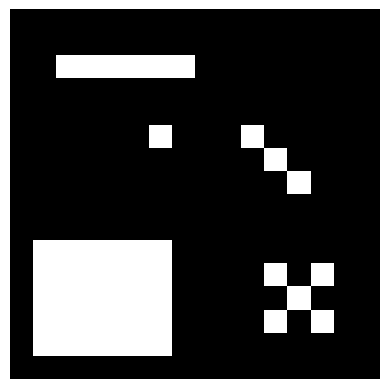

In [37]:
import matplotlib.pyplot as plt

plt.imshow(I, cmap="gray")
plt.axis("off")
plt.show()

In [38]:
plt.imsave("og_img.png", I)

In [39]:
import cv2

In [40]:
og_img = cv2.imread("og_img.png", 0)
og_img.shape

(16, 16)

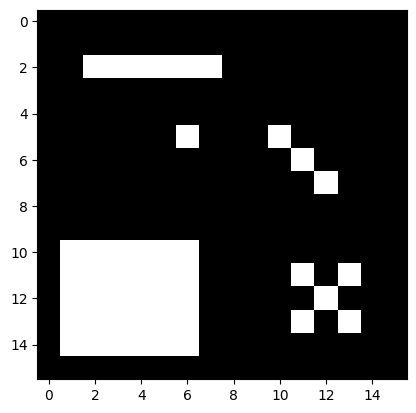

In [41]:
plt.imshow(og_img, cmap="gray")

In [42]:
labeled_image, num_components = label_connected_components_scipy(I)
print("Labeled Image:\n", labeled_image)
print("\nNumber of Connected Components:", num_components)

Labeled Image:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0]
 [0 4 4 4 4 4 4 0 0 0 0 5 0 5 0 0]
 [0 4 4 4 4 4 4 0 0 0 0 0 5 0 0 0]
 [0 4 4 4 4 4 4 0 0 0 0 5 0 5 0 0]
 [0 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

Number of Connected Components: 5


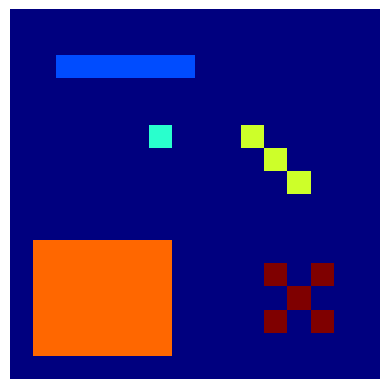

In [43]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(labeled_image, cmap="jet")
plt.show()

In [44]:
np

<module 'numpy' from '/home/wissem/.local/lib/python3.10/site-packages/numpy/__init__.py'>

In [45]:
import cv2


def label_connected_components_cv(
    binary_image: np.ndarray, adj: int = 4
) -> Tuple[np.ndarray, int]:
    """
    Labels all connected regions in a binary image and computes the number of connected components.

    Parameters:
        binary_image (numpy.ndarray): Input binary image (0s and 1s).

    Returns:
        labeled_image (numpy.ndarray): Image with connected components labeled.
        num_components (int): Number of connected components found.
    """

    binary_image = (binary_image > 0).astype(np.uint8) * 255
    num_components, labeled_image, stats, centroids = cv2.connectedComponentsWithStats(
        binary_image, connectivity=adj
    )

    return labeled_image, num_components

In [46]:
labeled_img, num_components = label_connected_components_cv(I, adj=8)

print("Number of connected components:", num_components)
print("Labeled Image:\n", labeled_img)

Number of connected components: 6
Labeled Image:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0]
 [0 4 4 4 4 4 4 0 0 0 0 5 0 5 0 0]
 [0 4 4 4 4 4 4 0 0 0 0 0 5 0 0 0]
 [0 4 4 4 4 4 4 0 0 0 0 5 0 5 0 0]
 [0 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


The difference is that one libary takes the background as a component and the ohter one doesn't

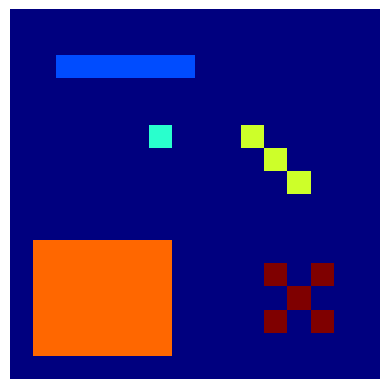

In [47]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(labeled_img, cmap="jet")
plt.show()

`cv2.RETR_TREE` retrieves all contours and organizes them hierarchically.

`cv2.CHAIN_APPROX_SIMPLE` compresses the contours by keeping only the key points.

`cv2.arcLength()` calculates the perimeter of the contour.


`cv2.approxPolyDP()` approximates the shape based on the contour's perimeter. This simplifies the contour to fewer points for easier classification.

`cv2.moments(contour)` computes the spatial moments of the contour, which are scalar quantities that provide information about the contour's geometry, such as its area, centroid, and orientation.

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def detect_shapes_in_image(image_path, classify_shape: bool = False):

    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(
            f"Image not found at {image_path}. Please provide a valid path."
        )
    # convernt to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    # where pixel values below 127 are set to black (0), and values above 127 are set to white (255)

    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    print(len(contours))
    for contour in contours:
        # approximation of the shape
        epsilon = 0.001 * cv2.arcLength(
            contour, True
        )  # perimeter of the contour, bigger spilon, smoother contour
        approx = cv2.approxPolyDP(contour, epsilon, True)  # polygonisation
        # draw in contours based on the approximation
        cv2.drawContours(image, [approx], 0, (0, 255, 0), thickness=3)

        # the center point ( moment )
        M = cv2.moments(contour)
        if M["m00"] != 0:  # The zeroth moment, representing the area of the contour.
            # we make sure the contour is a closed shape
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 7))
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.show()

3


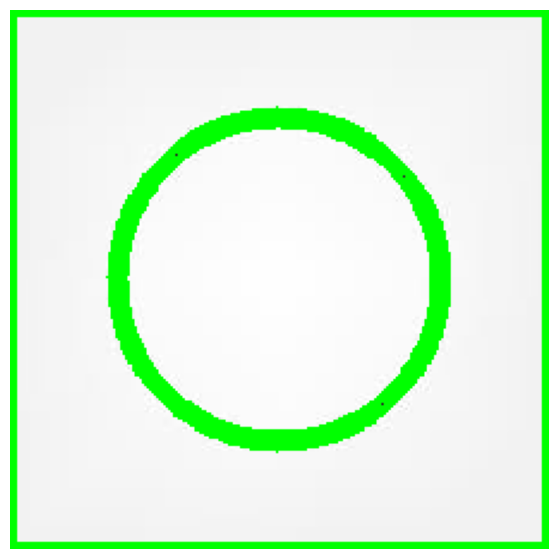

In [49]:
detect_shapes_in_image("circle.jpeg")

2


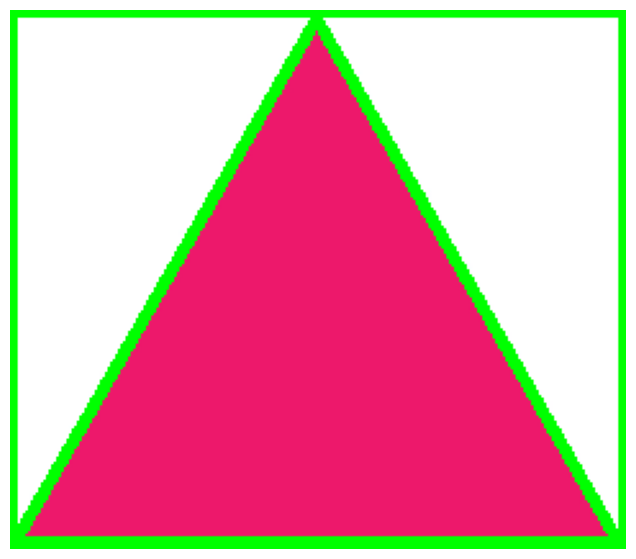

In [50]:
detect_shapes_in_image("triangle.png")

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def detect_shapes_in_image(image_path, classify_shape: bool = False):

    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(
            f"Image not found at {image_path}. Please provide a valid path."
        )
    # convernt to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    # where pixel values below 127 are set to black (0), and values above 127 are set to white (255)

    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    print(len(contours))
    for contour in contours:

        # approximation of the shape
        epsilon = 0.001 * cv2.arcLength(
            contour, True
        )  # perimeter of the contour, bigger spilon, smoother contour
        approx = cv2.approxPolyDP(contour, epsilon, True)  # polygonisation

        # draw in contours based on the approximation
        cv2.drawContours(image, [approx], 0, (0, 255, 0), thickness=3)

        # the center point ( moment )
        M = cv2.moments(contour)
        if M["m00"] != 0:  # The zeroth moment, representing the area of the contour.
            # we make sure the contour is a closed shape
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0

        shape_name = ""
        num_vertices = len(approx)

        if num_vertices == 3:
            shape_name = "Triangle"
        elif num_vertices == 4:
            # Check for rectangle or square
            x, y, w, h = cv2.boundingRect(approx)
            aspect_ratio = float(w) / h
            shape_name = "Square" if aspect_ratio == 1 else "Rectangle"
        elif num_vertices > 4:
            shape_name = "Circle"

        cv2.putText(
            image,
            shape_name,
            (cX, cY),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (255, 255, 255),
            2,
        )

    # Convert BGR image to RGB for Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.figure(figsize=(10, 7))
    plt.imshow(image_rgb)
    plt.axis("off")  # Hide the axis
    plt.show()

3


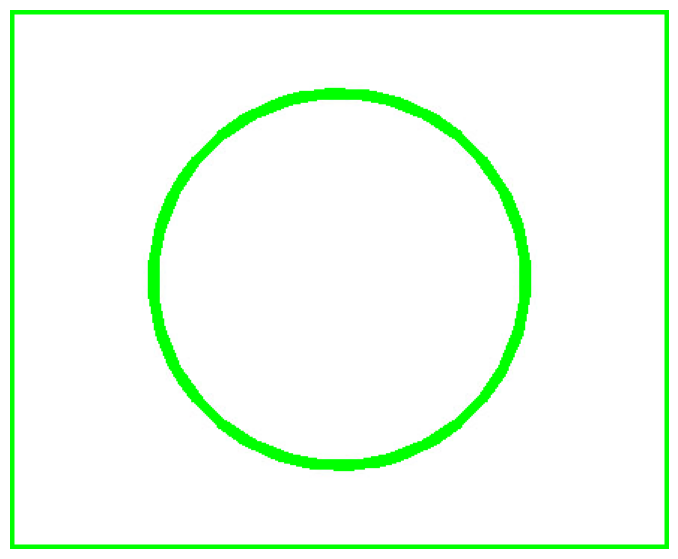

In [52]:
detect_shapes_in_image("circle2.jpg")

157


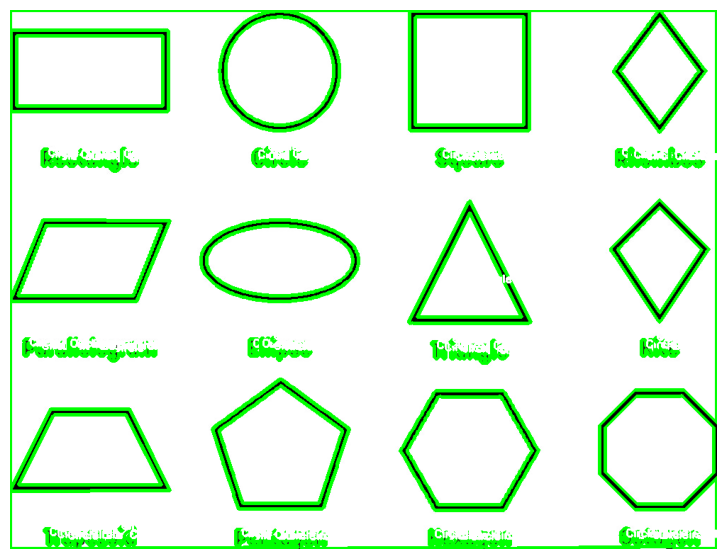

In [53]:
detect_shapes_in_image("shapes.jpg")

# =====================

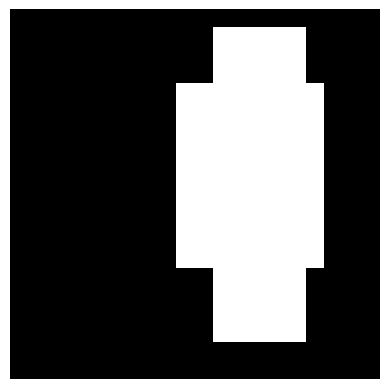

In [54]:
A = np.zeros((20, 20)).astype("bool")
A[4:14, 9:17] = True
A[1:18, 11:16] = True
plt.imshow(A, cmap="grey")
plt.axis("off")
plt.show()

In [55]:
A.shape

(20, 20)

In [56]:
!pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable


In [57]:
from skimage.morphology import binary_erosion, square, diamond

# 4-connectivity (diamond shape)
C4 = A ^ binary_erosion(A, diamond(1))

# 8-connectivity (square shape)
C8 = A ^ binary_erosion(A, square(3))

In [58]:
type(C4)

numpy.ndarray

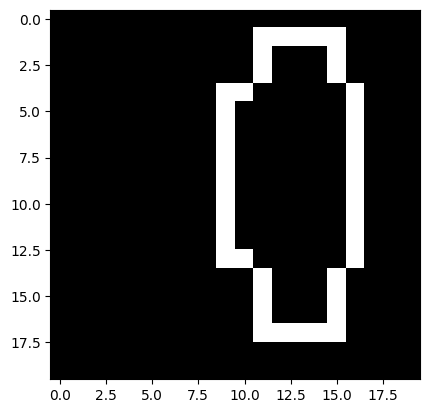

In [59]:
plt.imshow(C4, cmap="gray")

In [60]:
type(C8)

numpy.ndarray

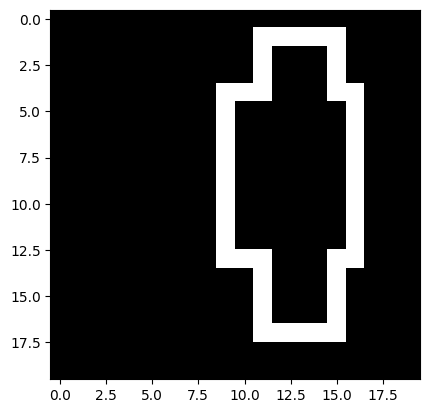

In [61]:
plt.imshow(C8, cmap="gray")

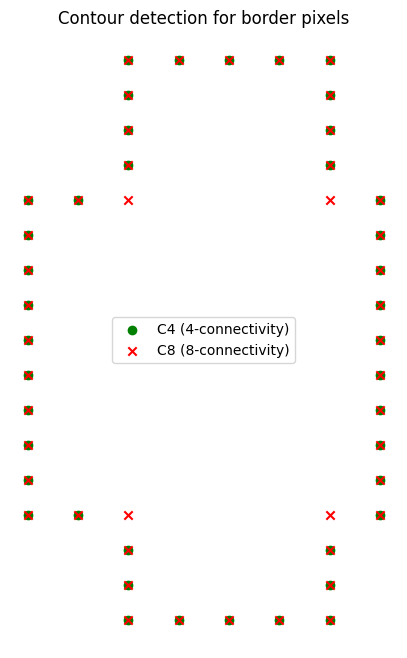

In [62]:
contour_coords_C4 = np.argwhere(C4)
contour_coords_C8 = np.argwhere(C8)

plt.figure(figsize=(5, 8))
plt.scatter(
    contour_coords_C4[:, 1],
    contour_coords_C4[:, 0],
    color="green",
    label="C4 (4-connectivity)",
)
plt.scatter(
    contour_coords_C8[:, 1],
    contour_coords_C8[:, 0],
    color="red",
    label="C8 (8-connectivity)",
    marker="x",
)
plt.title("Contour detection for border pixels")
plt.legend()
plt.axis("off")
plt.show()

starting ôpoint top left

counterclock direction

## Freeman chain code

<div>
<img src='freeman_chain.png'>
</div>

In [63]:
import numpy as np


def freeman_chain_code(contour, connectivity="C4"):
    # Direction mapping for N4 or N8 connectivity
    if connectivity == "C4":
        directions = [(-1, 0), (0, 1), (1, 0), (0, -1)]  # N, E, S, W
        code_map = {(-1, 0): 2, (0, 1): 1, (1, 0): 0, (0, -1): 3}
    elif connectivity == "C8":
        directions = [
            (-1, 0),
            (-1, 1),
            (0, 1),
            (1, 1),
            (1, 0),
            (1, -1),
            (0, -1),
            (-1, -1),
        ]  # N, NE, E, SE, S, SW, W, NW
        code_map = {
            (-1, 0): 4,
            (-1, 1): 3,
            (0, 1): 2,
            (1, 1): 1,
            (1, 0): 0,
            (1, -1): 6,
            (0, -1): 7,
            (-1, -1): 5,
        }
    else:
        raise ValueError(
            f"Connectivity can either be C4 or C8, you passe : {connectivity}"
        )
    # Find the first contour point (from left to right, top to bottom)
    start_point = np.argwhere(contour)[0]
    x, y = start_point
    chain_code = []

    # Keep track of visited points to avoid revisiting
    visited = set()
    visited.add((x, y))

    # Start tracing the contour
    while True:
        for i, (dx, dy) in enumerate(directions):
            new_x, new_y = x + dx, y + dy

            # Check bounds and if the point has not been visited yet
            if (
                0 <= new_x < contour.shape[0]
                and 0 <= new_y < contour.shape[1]
                and (new_x, new_y) not in visited
                and contour[new_x, new_y]
            ):  # If it's part of the contour

                # Append the direction code and mark the new point as visited
                chain_code.append(code_map[(dx, dy)])
                visited.add((new_x, new_y))

                # Move to the next point
                x, y = new_x, new_y
                break
        else:
            # If no unvisited neighbor is found, exit the loop
            break

    return chain_code


chain_code_C4 = freeman_chain_code(C8, connectivity="C4")
chain_code_C8 = freeman_chain_code(contour=C4, connectivity="C8")

print("Freeman chain code for 4-connectivity:", chain_code_C4)
print("Freeman chain code for 8-connectivity:", chain_code_C8)

Freeman chain code for 4-connectivity: [1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2]
Freeman chain code for 8-connectivity: [2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 7, 7, 7, 7, 4, 4, 4, 5, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 4]


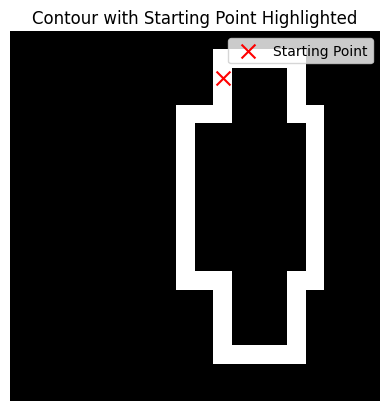

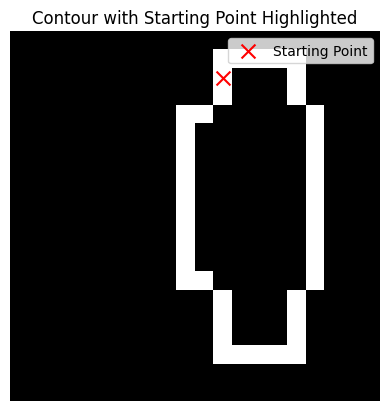

Freeman chain code for 4-connectivity: [1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2]
Freeman chain code for 8-connectivity: [2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 7, 7, 7, 7, 4, 4, 4, 5, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 4]


In [69]:
def freeman_chain_code(contour, connectivity="C4", plot_sp=False):
    # Direction mapping for N4 or N8 connectivity (clockwise order)
    if connectivity == "C4":
        directions = [(-1, 0), (0, 1), (1, 0), (0, -1)]  # N, E, S, W
        code_map = {(-1, 0): 2, (0, 1): 1, (1, 0): 0, (0, -1): 3}
    elif connectivity == "C8":
        directions = [
            (-1, 0),
            (-1, 1),
            (0, 1),
            (1, 1),
            (1, 0),
            (1, -1),
            (0, -1),
            (-1, -1),
        ]  # N, NE, E, SE, S, SW, W, NW
        code_map = {
            (-1, 0): 4,
            (-1, 1): 3,
            (0, 1): 2,
            (1, 1): 1,
            (1, 0): 0,
            (1, -1): 6,
            (0, -1): 7,
            (-1, -1): 5,
        }
    else:
        raise ValueError(
            f"Connectivity can either be C4 or C8, you passed: {connectivity}"
        )

    # Find the starting point (upper-left point of the contour)
    start_points = np.argwhere(contour)
    if len(start_points) == 0:
        return []  # No contour found
    start_point = start_points[0]  # Take the first found point
    x, y = start_point
    chain_code = []

    # Keep track of visited points to avoid revisiting
    visited = set()
    visited.add((x, y))

    # Start tracing the contour
    while True:
        found = False  # To track if a new point is found
        for dx, dy in directions:
            new_x, new_y = x + dx, y + dy

            # Check bounds and if the point has not been visited yet
            if (
                0 <= new_x < contour.shape[0]
                and 0 <= new_y < contour.shape[1]
                and (new_x, new_y) not in visited
                and contour[new_x, new_y]
            ):  # If it's part of the contour

                # Append the direction code and mark the new point as visited
                chain_code.append(code_map[(dx, dy)])
                visited.add((new_x, new_y))

                # Move to the next point
                x, y = new_x, new_y
                found = True
                break  # Break the for loop and start from the new point

        if not found:
            # If no unvisited neighbor is found, exit the loop
            break

    # Plotting if flag is set
    if plot_sp:
        plt.imshow(contour, cmap="gray")
        plt.scatter(
            y, x, color="red", s=100, marker="x", label="Starting Point"
        )  # Cross on the starting point
        plt.title("Contour with Starting Point Highlighted")
        plt.axis("off")
        plt.legend()
        plt.show()

    return chain_code


chain_code_C4 = freeman_chain_code(C8, connectivity="C4", plot_sp=True)
chain_code_C8 = freeman_chain_code(contour=C4, connectivity="C8", plot_sp=True)

print("Freeman chain code for 4-connectivity:", chain_code_C4)
print("Freeman chain code for 8-connectivity:", chain_code_C8)

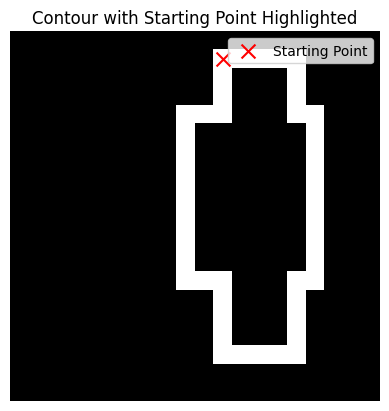

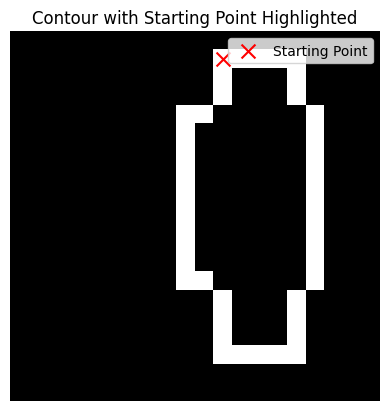

Freeman chain code for 4-connectivity: [1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2]
Freeman chain code for 8-connectivity: [2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 7, 7, 7, 7, 4, 4, 4, 5, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 4]


In [70]:
def freeman_chain_code(contour, connectivity="C4", plot_sp=False):
    # Direction mapping for N4 or N8 connectivity (clockwise order)
    if connectivity == "C4":
        directions = [(-1, 0), (0, 1), (1, 0), (0, -1)]  # N, E, S, W
        code_map = {(-1, 0): 2, (0, 1): 1, (1, 0): 0, (0, -1): 3}
    elif connectivity == "C8":
        directions = [
            (-1, 0),
            (-1, 1),
            (0, 1),
            (1, 1),
            (1, 0),
            (1, -1),
            (0, -1),
            (-1, -1),
        ]  # N, NE, E, SE, S, SW, W, NW
        code_map = {
            (-1, 0): 4,
            (-1, 1): 3,
            (0, 1): 2,
            (1, 1): 1,
            (1, 0): 0,
            (1, -1): 6,
            (0, -1): 7,
            (-1, -1): 5,
        }
    else:
        raise ValueError(
            f"Connectivity can either be C4 or C8, you passed: {connectivity}"
        )

    # Find the starting point (topmost left point of the contour)
    contours = np.argwhere(contour)
    if len(contours) == 0:
        return []  # No contour found
    # Find the point with the minimum row (topmost) and then the minimum column (leftmost)
    start_point = contours[np.argmin(contours[:, 0])]  # Topmost point
    start_x, start_y = start_point

    chain_code = []

    # Keep track of visited points to avoid revisiting
    visited = set()
    visited.add((start_x, start_y))

    # Start tracing the contour
    x, y = start_x, start_y
    while True:
        found = False  # To track if a new point is found
        for dx, dy in directions:
            new_x, new_y = x + dx, y + dy

            # Check bounds and if the point has not been visited yet
            if (
                0 <= new_x < contour.shape[0]
                and 0 <= new_y < contour.shape[1]
                and (new_x, new_y) not in visited
                and contour[new_x, new_y]
            ):  # If it's part of the contour

                # Append the direction code and mark the new point as visited
                chain_code.append(code_map[(dx, dy)])
                visited.add((new_x, new_y))

                # Move to the next point
                x, y = new_x, new_y
                found = True
                break  # Break the for loop and start from the new point

        if not found:
            # If no unvisited neighbor is found, exit the loop
            break

    # Plotting if flag is set
    if plot_sp:
        plt.imshow(contour, cmap="gray")
        plt.scatter(
            start_y, start_x, color="red", s=100, marker="x", label="Starting Point"
        )  # Cross on the starting point
        plt.title("Contour with Starting Point Highlighted")
        plt.axis("off")
        plt.legend()
        plt.show()

    return chain_code


chain_code_C4 = freeman_chain_code(C8, connectivity="C4", plot_sp=True)
chain_code_C8 = freeman_chain_code(contour=C4, connectivity="C8", plot_sp=True)

print("Freeman chain code for 4-connectivity:", chain_code_C4)
print("Freeman chain code for 8-connectivity:", chain_code_C8)

In [66]:
def plot_freeman_chain_code(A, contour, chain_code, connectivity):
    # plt.figure(figsize=(8,14))
    fig, ax = plt.subplots()

    # Plot the original binary shape
    ax.imshow(A, cmap="gray")

    # Get the coordinates of contour points
    contour_points = np.argwhere(contour)

    # Overlay contour points
    for x, y in contour_points:
        ax.plot(y, x, "ro")

    # Check lengths
    num_points = len(contour_points)
    num_codes = len(chain_code)

    print(f"Contour Points: {num_points}, Chain Codes: {num_codes}")  # Debugging info

    # Annotate Freeman chain codes on the contour points
    for i, (x, y) in enumerate(contour_points):
        if i < num_codes:  # Only annotate if we have a corresponding chain code
            ax.text(
                y,
                x,
                str(chain_code[i]),
                color="black",
                fontsize=9,
                ha="center",
                va="center",
            )

    ax.set_title(f"Freeman Chain Code ({connectivity})")
    ax.axis("off")  # Hide axes for better visualization
    plt.show()

In [67]:
contour_coords_C4 = np.argwhere(C4)
contour_coords_C8 = np.argwhere(C8)

Contour Points: 42, Chain Codes: 45


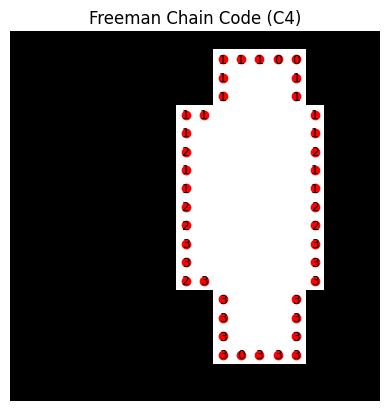

Contour Points: 46, Chain Codes: 41


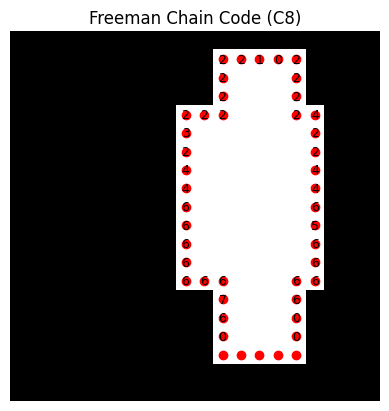

In [68]:
plot_freeman_chain_code(A, C4, chain_code_C4, "C4")
plot_freeman_chain_code(A, C8, chain_code_C8, "C8")

### SEND A DETAILED REPORT ABOUT EXO HEDA